D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 455 samples, validate on 114 samples
Epoch 1/30
455/455 [==============================] - 0s 1ms/sample - loss: 0.5164 - acc: 0.7604 - val_loss: 0.2717 - val_acc: 0.9649
Epoch 2/30
455/455 [==============================] - 0s 77us/sample - loss: 0.2221 - acc: 0.9385 - val_loss: 0.1536 - val_acc: 0.9561
Epoch 3/30
455/455 [==============================] - 0s 66us/sample - loss: 0.1486 - acc: 0.9473 - val_loss: 0.1121 - val_acc: 0.9561
Epoch 4/30
455/455 [==============================] - 0s 84us/sample - loss: 0.1155 - acc: 0.9604 - val_loss: 0.0919 - val_acc: 0.9561
Epoch 5/30
455/455 [==============================] - 0s 79us/sample - loss: 0.0966 - acc: 0.9714 - val_loss: 0.0821 - val_acc: 0.9737
Epoch 6/30
455/455 [==============================] - 0s 75us/sample - loss: 0.0842 - acc: 0.9736 - val_loss: 0.0761 - val_acc: 0.9737
Epoch 7/30
455/455 [=======

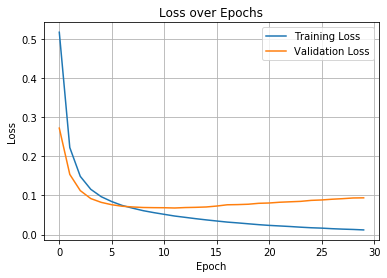

In [1]:
# Importing TensorFlow library for building and training deep learning models
import tensorflow as tf

# Importing a built-in breast cancer dataset from scikit-learn
from sklearn.datasets import load_breast_cancer

# Importing function to split the dataset into training and test sets
from sklearn.model_selection import train_test_split

# Importing class to standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Importing NumPy for numerical operations (not directly used here, but often needed)
import numpy as np

# Importing classes to build a Sequential model and dense (fully connected) layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Importing utility function to convert labels into one-hot encoded vectors
from tensorflow.keras.utils import to_categorical

# Importing categorical cross-entropy loss for multi-class classification problems
from tensorflow.keras.losses import CategoricalCrossentropy

# Importing matplotlib for data visualization and plotting graphs
import matplotlib.pyplot as plt

# Loading the breast cancer dataset
data = load_breast_cancer()

# Extracting the feature matrix (input data)
X = data.data

# Extracting the target labels (binary classification: malignant or benign)
Y = data.target

# Converting labels to one-hot encoded format (e.g., [1, 0] or [0, 1])
Y = to_categorical(Y, 2)

# Splitting data into training and test sets (80% training, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initializing a standard scaler to normalize the feature values
scaler = StandardScaler()

# Fitting the scaler on training data and transforming it
X_train = scaler.fit_transform(X_train)

# Using the same scaler to transform the test data
X_test = scaler.transform(X_test)

# Defining the architecture of the neural network using Sequential model
model = Sequential([
    # First hidden layer with 64 units and ReLU activation, input has 30 features
    Dense(units=64, activation='relu', input_shape=(30,)),
    # Second hidden layer with 32 units and ReLU activation
    Dense(units=32, activation='relu'),
    # Output layer with 2 units (for 2 classes) and softmax activation
    Dense(units=2, activation='softmax')
])

# Compiling the model with Adam optimizer and categorical cross-entropy loss
model.compile(
    optimizer='adam',
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']  # Tracking accuracy during training
)

# Training the model on the training data for 30 epochs with batch size of 32
history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

# Evaluating the trained model on the test dataset
loss, accuracy = model.evaluate(X_test, Y_test)

# Printing the final accuracy on test data as a percentage
print(f" Accuracy : {accuracy * 100:.2f}%")

# Plotting training and validation loss over epochs to visualize model performance
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# Importing matplotlib to display images
import matplotlib.pyplot as plt

# Importing numpy to perform numerical operations (like argmax)
import numpy as np
class_name = ['Malignant', 'Benign']
index = 111

prediction = model.predict(X_test[index].reshape(1,-1))
predicted_class = class_name[np.argmax(prediction)]
print(f"Predicted: {predicted_class}")
print("Actual label:" , class_name[np.argmax(Y_test[index])])

Predicted: Benign
Actual label: Benign
